# Projet : Analyse de Réseaux Sociaux Facebook
                                           
## Objectif
Ce projet a pour but d'analyser un réseau social à partir des données Facebook issues du dataset `facebook_combine.txt` disponible sur [Stanford Network Analysis Project](https://snap.stanford.edu/data/ego-Facebook.html).

Les étudiants devront :
- Utiliser **NetworkX** pour manipuler et analyser le réseau Facebook.
- Appliquer les méthodes d’analyse des réseaux sociaux à des données réelles.
- Visualiser les résultats des analyses avec des graphes interactifs.
- Interpréter les résultats obtenus.

## Concepts abordés
Ce projet mettra en pratique les concepts suivants :
- **Métriques topologiques globales** : densité, diamètre, clustering coefficient, etc.
- **Métriques de centralité** : centralité de degré, centralité de proximité, centralité d'intermédiarité.
- **Méthode d'analyse structurale** : composantes connexes, sous-graphes.
- **Détection communautaire** : algorithmes de Louvain, Girvan-Newman.
- **Diffusion d'information** : propagation de contenu sur un réseau.
- **Campagne de marketing sur Facebook** : ciblage des influenceurs, impact de la diffusion virale.

## Instructions
Le projet doit être documenté dans ce notebook avec des explications en **Markdown** et des **zones de code** où vous implémenterez vos analyses en **Python** avec **NetworkX**.

## 1. Importation des bibliothèques

In [92]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import community  # Pour la détection de communautés
import matplotlib.pyplot as plt

plt.close('all')

%matplotlib inline

## 2. Chargement des données

In [1]:
data = pd.read_csv("facebook_combined.txt")
print(data.head(5))
G = nx.read_edgelist("facebook_combined.txt")
print(nx.info(G))

NameError: name 'pd' is not defined

#### Affichage des informations de base

Utiliser print pour affichier les formations de base du graphe
Remplacer le 0 par l'instruction pour afficher le nombre de noeuds et le nombre d'arêtes

In [3]:
nbr_noeuds = nx.number_of_nodes(G)
nbr_aretes =  nx.number_of_edges(G)
print(f'Nombre de nœuds : {nbr_noeuds}')
print(f'Nombre d\'arêtes : {nbr_aretes}')

Nombre de nœuds : 4039
Nombre d'arêtes : 88234


## 3. Affichage d'une partie du Graphe
La visualisation joue un rôle central dans l'analyse exploratoire des données pour nous aider à obtenir une idée qualitative des données.

<Figure size 1200x800 with 0 Axes>

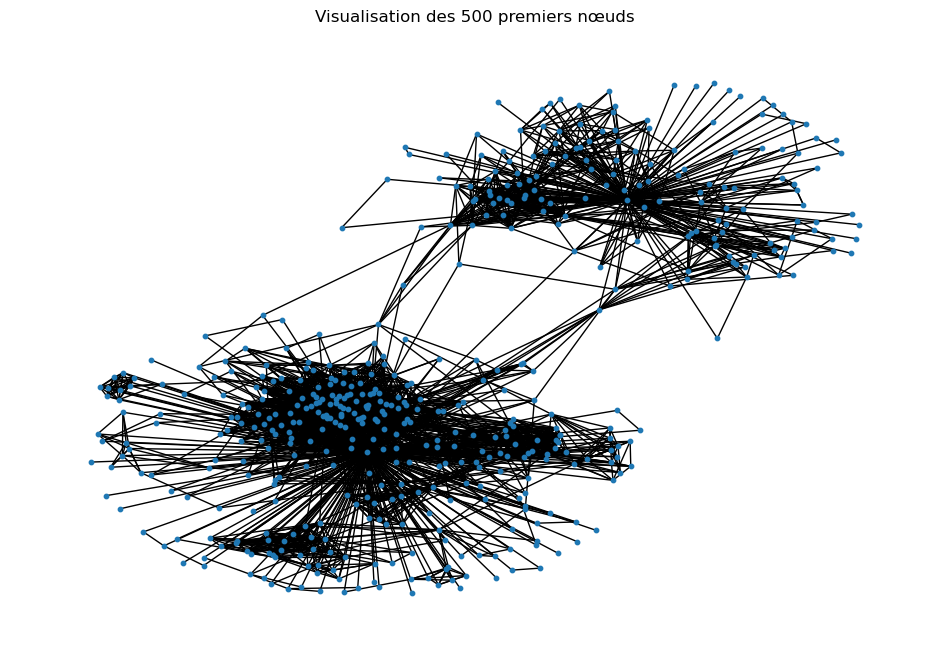

In [4]:
# subgraph = expression_a_completer # Extraction des 500 premiers noeuds
# Visualisation du sous-graphe
# Utiliser plt.figure et nx.draw pour afficher le sous-graphe
# Utiliser spring_layout pour positionner les noeuds

nbr_noeuds = len(G.nodes)
first_500_nodes = list(G.nodes)[:min(500, nbr_noeuds)] 

# Créer un sous-graphe ,Extraire les 500 premiers noeuds
subgraph = G.subgraph(first_500_nodes)

# Visualisation du sous-graphe

pos = nx.spring_layout(subgraph, iterations=15, seed=1721)  # Positionnement des nœuds avec spring_layout
plt.figure(figsize=(12, 8))  # Définir la taille de la figure pour une meilleure visualisation
fig, ax = plt.subplots(figsize=(12, 8))
nx.draw(subgraph, pos, with_labels=False, 
        node_size=10, font_size=10, font_weight='bold', ax=ax)
plt.title("Visualisation des 500 premiers nœuds")
plt.show()


## 4. Analyse des métriques topologiques globales

Calculer et afficher la densié du graphe
Calculer et afficher le coefficient de clustering

- Calculer la densité
- Calculer le diametre
- Calculer le coefficient de clustering

In [5]:
#Ajouter le code pour caculer et afficher:
# - la densité du graphe
densité=nx.density(G)
print('la densité du graphe est: ',densité)

# - le diamètre du graphe
diamètre = nx.diameter(G)
print('le diamtre du graphe est: ',diamètre)
# - le coefficient de clustering moyen
ccm= nx.average_clustering(G)
print('le coefficient de clustering moyen du graphe est: ',ccm)

la densité du graphe est:  0.010819963503439287
le diamtre du graphe est:  8
le coefficient de clustering moyen du graphe est:  0.6055467186200876


## 4. Analyse des métriques structurels

Dans cette section, vous allez explorer différentes mesures de centralité pour identifier les nœuds les plus influents du réseau.

### 1. Calculer et visualiser la distribution de degré

1. Calculez la distribution des degrés des nœuds dans le réseau.
2. Affichez les 10 premiers nœuds avec le degré le plus élevé sous forme de dataframe.
3. Visualisez cette distribution à l'aide d'un histogramme.

Top 10 des nœuds avec le degré le plus élevé :
  Noeud  Degré
0   107   1045
1  1684    792
2  1912    755
3  3437    547
4     0    347
5  2543    294
6  2347    291
7  1888    254
8  1800    245
9  1663    235


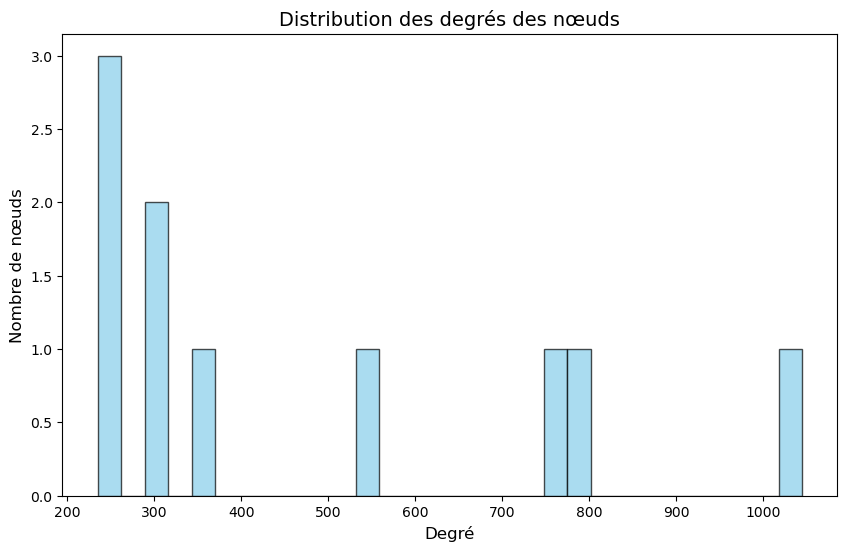

In [11]:
# Ajouter le code pour calculer et visualiser la distribution des degrés

#Calcul de la distribution des degrés des nœuds dans le réseau.

degrees=(sorted(G.degree, key=lambda item: item[1], reverse=True))[:10]

                             #*************************************************#

#Affichez les 10 premiers nœuds avec le degré le plus élevé sous forme de dataframe.
df_top_10 = pd.DataFrame(degrees, columns=["Noeud", "Degré"])
print("Top 10 des nœuds avec le degré le plus élevé :")
print(df_top_10)


                             #*************************************************#
plt.figure(figsize=(10, 6))
plt.hist(df_top_10["Degré"], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution des degrés des nœuds", fontsize=14)
plt.xlabel("Degré", fontsize=12)
plt.ylabel("Nombre de nœuds", fontsize=12)

plt.show()



### 2. Calculer et visualiser la centralité de degré

1. Calculez la centralité de degré des nœuds.
2. Affichez les 10 nœuds avec la plus haute centralité de degré.
3. Visualisez les résultats.

les 10 premiers nœuds avec la plus haute centralité de degré:
  Noeud  DegréDeCentralité
0   107           0.258791
1  1684           0.196137
2  1912           0.186974
3  3437           0.135463
4     0           0.085934
5  2543           0.072808
6  2347           0.072065
7  1888           0.062902
8  1800           0.060674
9  1663           0.058197


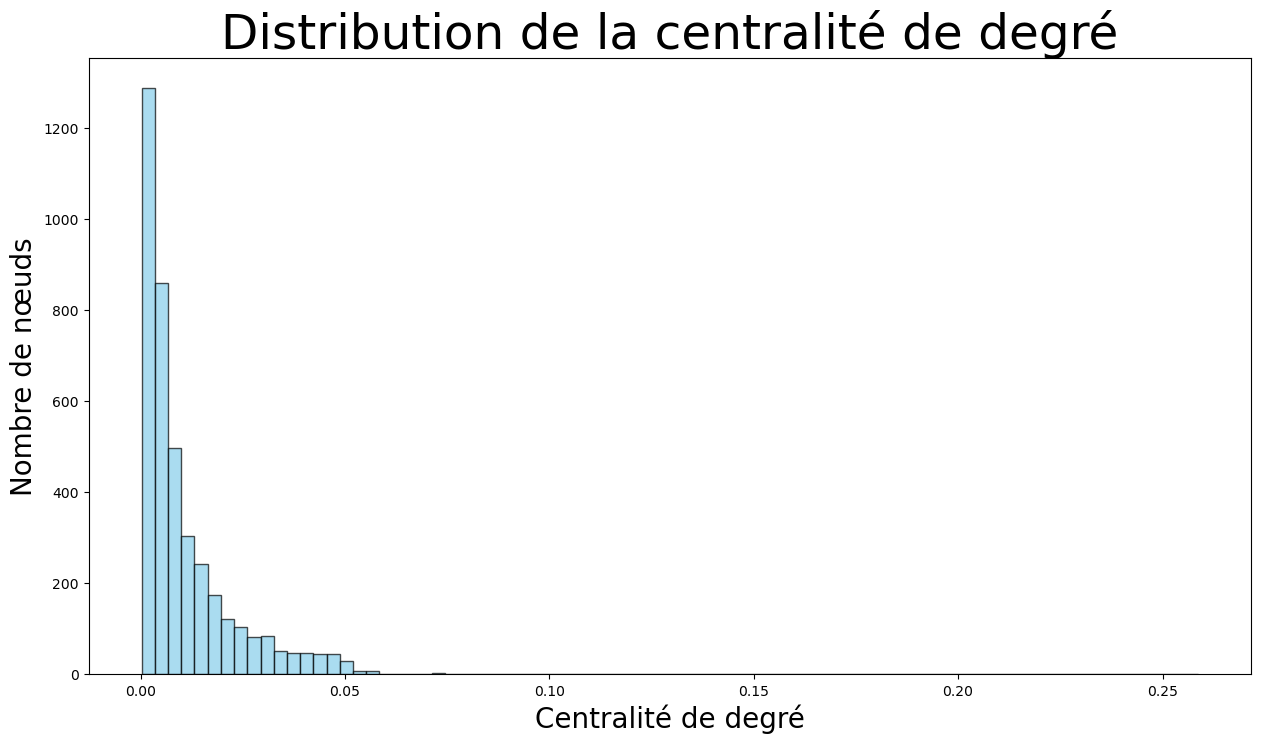

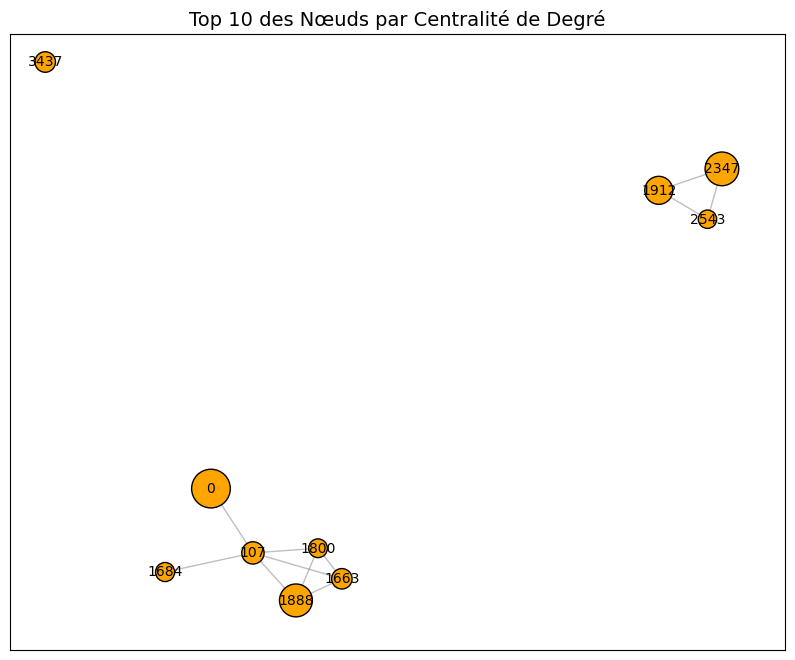

In [13]:
# Ajouter le code pour calculer et visualiser la centralité des degrés
centralité_de_degré = nx.centrality.degree_centrality(G)  

                        #*************************************************#
#Affichage des 10 nœuds avec la plus haute centralité de degré.
print("les 10 premiers nœuds avec la plus haute centralité de degré:")
cdd=(sorted(centralité_de_degré.items(), key=lambda item: item[1], reverse=True))[:10] 

df_centralité_top_10 = pd.DataFrame(cdd, columns=["Noeud", "DegréDeCentralité"])
print(df_centralité_top_10)

                       #*************************************************#
# Visualisation de la centralité de degré avec un histogramme
plt.figure(figsize=(15, 8))
plt.hist(centralité_de_degré.values(), bins=80, color='skyblue', edgecolor='black', alpha=0.7)

# Ajout des titres et labels
plt.title("Distribution de la centralité de degré", fontdict={"size": 35}, loc="center")
plt.xlabel("Centralité de degré", fontdict={"size": 20})
plt.ylabel("Nombre de nœuds", fontdict={"size": 20})

# Afficher l'histogramme
plt.show()
                       #*************************************************#
# Visualisation de la centralité de degré avec

top_nodes = [node for node, _ in cdd]

# Création du sous-graphe basé sur ces 10 nœuds
subgraph = G.subgraph(top_nodes)

# Positionner les nœuds avec spring_layout
pos = nx.spring_layout(subgraph, seed=42)  # Seed pour un affichage stable

plt.figure(figsize=(10, 8))

nx.draw_networkx_edges(subgraph, pos, alpha=0.5, edge_color='gray')

node_sizes = [centralité_de_degré[node] * 3000 for node in top_nodes]  # Ajustement de la taille
nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes, node_color='orange', edgecolors='black')

# Ajouter les labels des nœuds
nx.draw_networkx_labels(subgraph, pos, font_size=10, font_color='black')

# Ajouter un titre
plt.title("Top 10 des Nœuds par Centralité de Degré", fontsize=14)

# Afficher le graphe
plt.show()


### 3. Calculer et visualiser la centralité de proximité

1. Calculez la centralité de proximité.
2. Affichez les 10 nœuds avec la plus haute centralité de proximité.
3. Visualisez les résultats.

les 10 premiers nœuds avec la plus haute centralité de proximité:
  Noeud  CentralitéDeProximité
0   107               0.459699
1    58               0.397402
2   428               0.394837
3   563               0.393913
4  1684               0.393606
5   171               0.370493
6   348               0.369916
7   483               0.369848
8   414               0.369543
9   376               0.366558


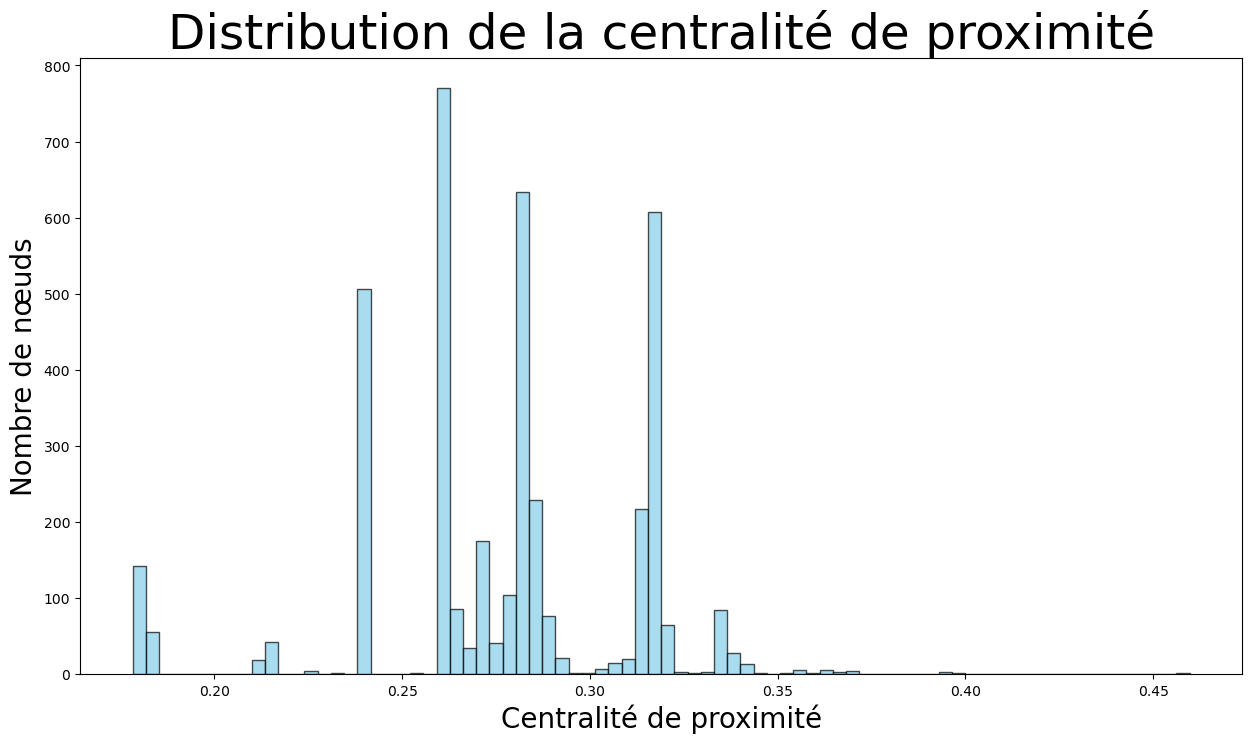

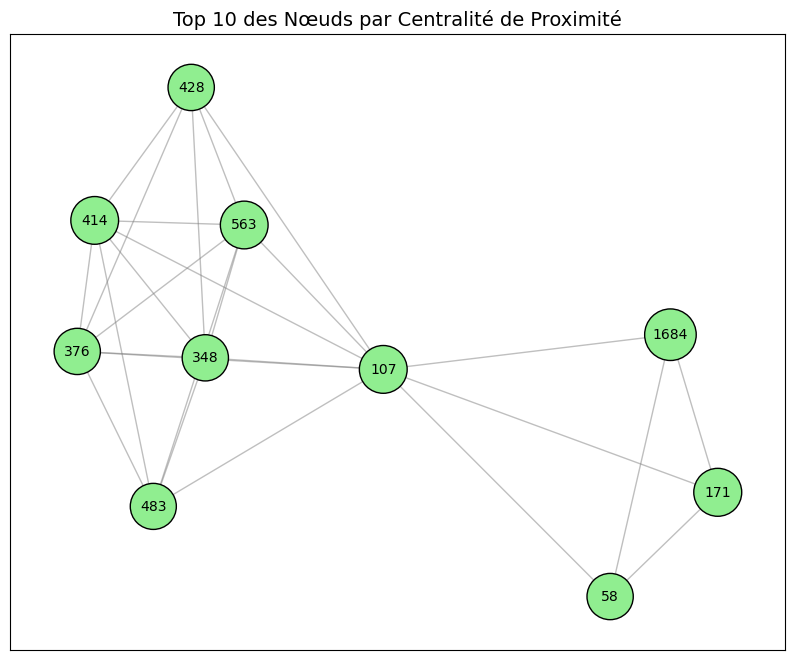

In [28]:
# Ajouter le code pour calculer et visualiser la centralité de proximité
centralité_de_proximité = nx.centrality.closeness_centrality(G)  

#Affichez les 10 nœuds avec la plus haute centralité de proximité.
print("les 10 premiers nœuds avec la plus haute centralité de proximité:")
cdp=(sorted(centralité_de_proximité.items(), key=lambda item: item[1], reverse=True))[:10]

df_cdp_top_10 = pd.DataFrame(cdp, columns=["Noeud", "CentralitéDeProximité"])
print(df_cdp_top_10)
                            #*************************************************#
# Visualisation de la centralité de degré avec un histogramme
plt.figure(figsize=(15, 8))
plt.hist(centralité_de_proximité.values(), bins=80, color='skyblue', edgecolor='black', alpha=0.7)

# Ajout des titres et labels
plt.title("Distribution de la centralité de proximité", fontdict={"size": 35}, loc="center")
plt.xlabel("Centralité de proximité", fontdict={"size": 20})
plt.ylabel("Nombre de nœuds", fontdict={"size": 20})

# Afficher l'histogramme
plt.show()
                         #*************************************************#
# Visualisation de la centralité de degré avec un graphe
top_nodes = [node for node, _ in cdp]

# Création du sous-graphe basé sur ces 10 nœuds
subgraph = G.subgraph(top_nodes)

pos = nx.spring_layout(subgraph, seed=42)  # Seed pour un affichage stable

plt.figure(figsize=(10, 8))

# Dessiner les arêtes
nx.draw_networkx_edges(subgraph, pos, alpha=0.5, edge_color='gray')

# Dessiner les nœuds avec une taille proportionnelle à leur centralité
node_sizes = [centralité_de_proximité[node] * 3000 for node in top_nodes]  # Ajustement de la taille
nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes, node_color='lightgreen', edgecolors='black')

# Ajouter les labels des nœuds
nx.draw_networkx_labels(subgraph, pos, font_size=10, font_color='black')

plt.title("Top 10 des Nœuds par Centralité de Proximité", fontsize=14)

plt.show()

### 4. Calculer et visualiser la centralité d'intermédiarité

1. Calculez la centralité d'intermédiarité.
2. Affichez les 10 nœuds avec la plus haute centralité d'intermédiarité.
3. Visualisez les résultats.

les 10 premiers nœuds avec la plus haute centralité d'intermédiarité :
  Noeud  CentralitéIntermédiarité
0   107                  0.480518
1  1684                  0.337797
2  3437                  0.236115
3  1912                  0.229295
4  1085                  0.149015
5     0                  0.146306
6   698                  0.115330
7   567                  0.096310
8    58                  0.084360
9   428                  0.064309


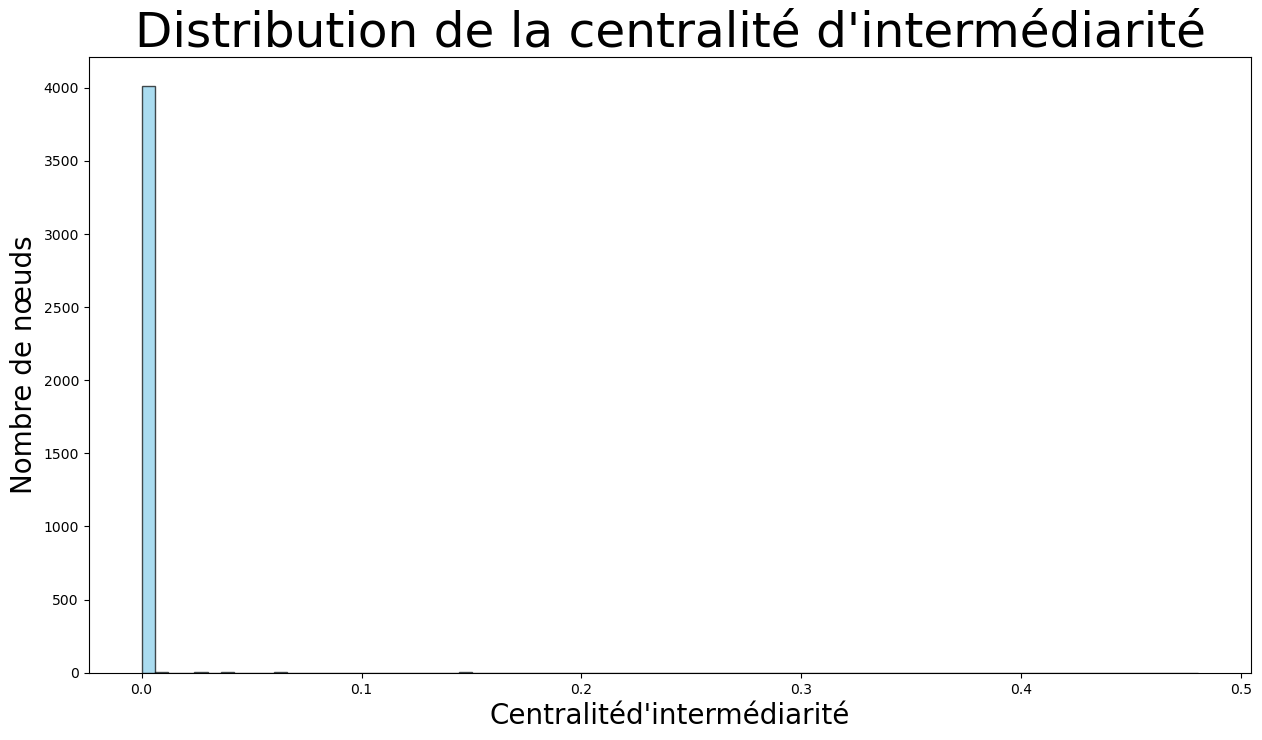

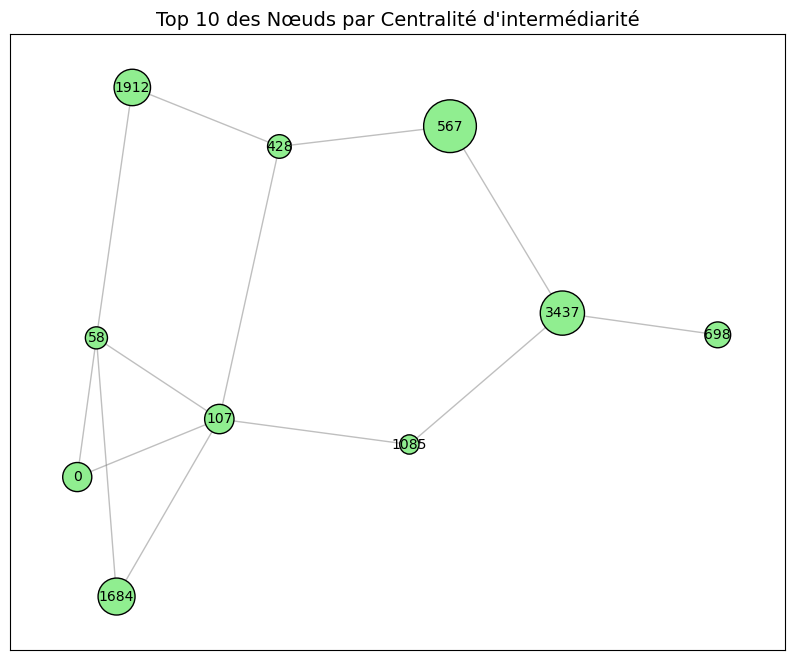

In [35]:
# Ajouter le code pour calculer et visualiser la centralité d'intermédiarité
centralité_intermédiarité = nx.centrality.betweenness_centrality(G)

print("les 10 premiers nœuds avec la plus haute centralité d'intermédiarité :")
cdinter=(sorted(centralité_intermédiarité.items(), key=lambda item: item[1], reverse=True))[:10]

df_cdinter_top_10 = pd.DataFrame(cdinter, columns=["Noeud", "CentralitéIntermédiarité"])
print(df_cdinter_top_10)
                                 
                           #*************************************************#
# Visualisation de la centralité d'intermédiarité avec un histogramme
plt.figure(figsize=(15, 8))
plt.hist(centralité_intermédiarité.values(), bins=80, color='skyblue', edgecolor='black', alpha=0.7)

# Ajout des titres et labels
plt.title("Distribution de la centralité d'intermédiarité", fontdict={"size": 35}, loc="center")
plt.xlabel("Centralitéd'intermédiarité", fontdict={"size": 20})
plt.ylabel("Nombre de nœuds", fontdict={"size": 20})

# Afficher l'histogramme
plt.show()
                          #*************************************************#
# Visualisation de la centralité de degré avec un graphe
top_nodes = [node for node, _ in cdinter]

# Création du sous-graphe basé sur ces 10 nœuds
subgraph = G.subgraph(top_nodes)

pos = nx.spring_layout(subgraph, seed=42)  # Seed pour un affichage stable

plt.figure(figsize=(10, 8))

# Dessiner les arêtes
nx.draw_networkx_edges(subgraph, pos, alpha=0.5, edge_color='gray')

# Dessiner les nœuds avec une taille proportionnelle à leur centralité
node_sizes = [centralité_intermédiarité[node] * 3000 for node in top_nodes]  # Ajustement de la taille
nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes, node_color='lightgreen', edgecolors='black')

# Ajouter les labels des nœuds
nx.draw_networkx_labels(subgraph, pos, font_size=10, font_color='black')

plt.title("Top 10 des Nœuds par Centralité d'intermédiarité", fontsize=14)

plt.show()

### 5. Calculer et visualiser la centralité de vecteur propre

1. Calculez la centralité d'intermédiarité.
2. Affichez les 10 nœuds avec la plus haute centralité de vecteur propre.
3. Visualisez les résultats.

les 10 premiers nœuds avec la plus haute centralité de vecteur propre :
  Noeud  CentralitéVecteurPropre
0  1912                 0.095407
1  2266                 0.086983
2  2206                 0.086052
3  2233                 0.085173
4  2464                 0.084279
5  2142                 0.084193
6  2218                 0.084156
7  2078                 0.084136
8  2123                 0.083671
9  1993                 0.083532


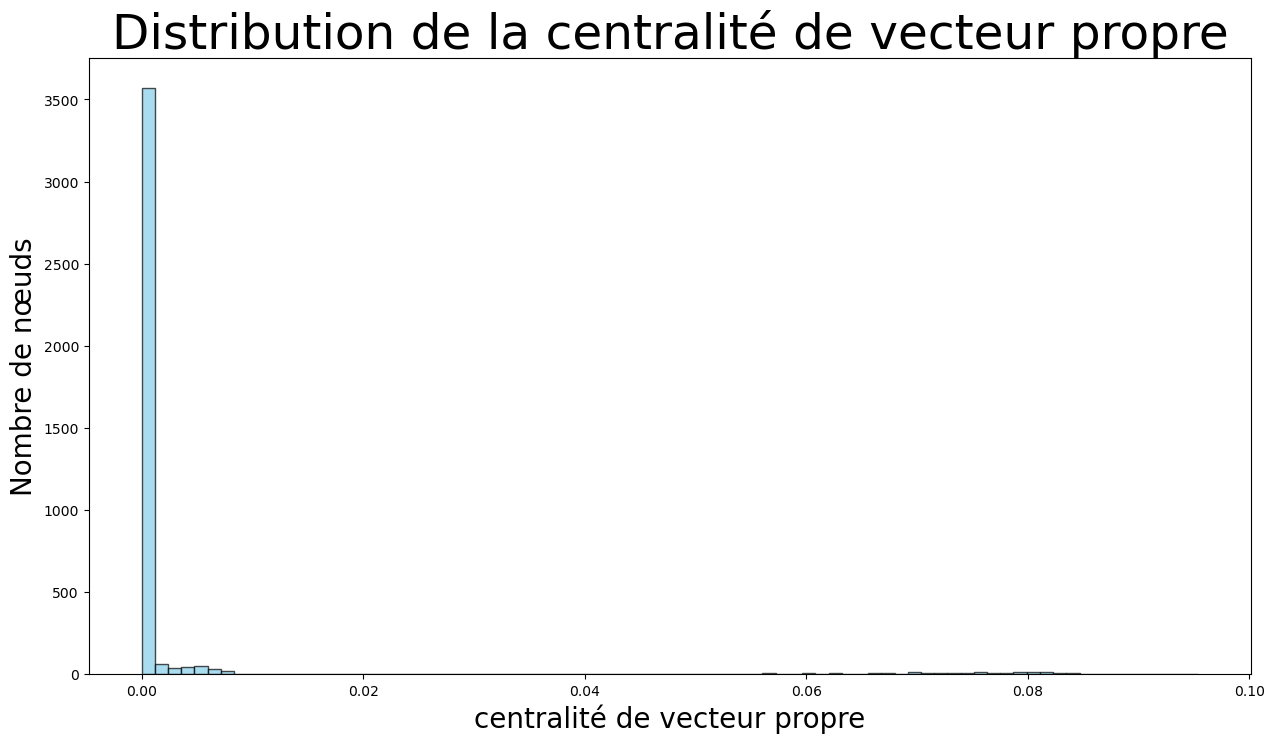

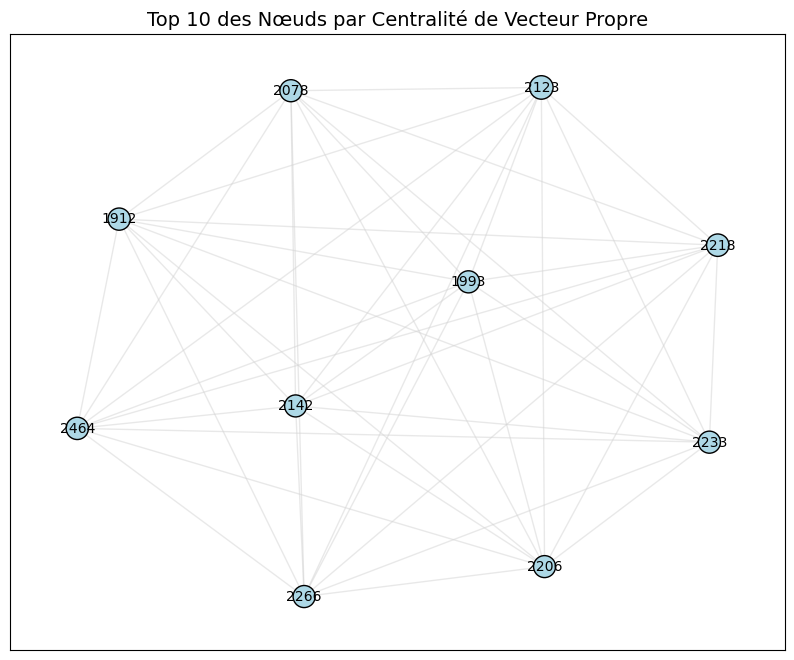

In [36]:
# Ajouter le code pour calculer et visualiser la centralité de vecteur propre
centralité_vecteur_propre = nx.centrality.eigenvector_centrality( G)  
cvp=(sorted(centralité_vecteur_propre.items(), key=lambda item: item[1], reverse=True))[:10]

print("les 10 premiers nœuds avec la plus haute centralité de vecteur propre :")
df_cvp_top_10 = pd.DataFrame(cvp, columns=["Noeud", "CentralitéVecteurPropre"])
print(df_cvp_top_10)
                    
                        #*************************************************#

# Visualisation de la centralité de vecteur propre avec un histogramme
plt.figure(figsize=(15, 8))
plt.hist(centralité_vecteur_propre.values(),bins=80, color='skyblue', edgecolor='black', alpha=0.7)

# Ajout des titres et labels
plt.title("Distribution de la centralité de vecteur propre", fontdict={"size": 35}, loc="center")
plt.xlabel("centralité de vecteur propre", fontdict={"size": 20})
plt.ylabel("Nombre de nœuds", fontdict={"size": 20})

# Afficher l'histogramme
plt.show()
                          #*************************************************#
# Visualisation de la centralitéde vecteur propreavec un graphe
top_nodes_vecteur_propre = [node for node, _ in cvp]

subgraph_vecteur_propre = G.subgraph(top_nodes_vecteur_propre)

pos_vecteur_propre = nx.spring_layout(subgraph_vecteur_propre, seed=42)  # Seed pour un affichage stable

plt.figure(figsize=(10, 8))

nx.draw_networkx_edges(subgraph_vecteur_propre, pos_vecteur_propre, alpha=0.5, edge_color='lightgray')

# Dessin des nœuds avec une taille proportionnelle à leur centralité
node_sizes_vecteur_propre = [centralité_vecteur_propre[node] * 3000 for node in top_nodes_vecteur_propre]  # Ajustement de la taille
nx.draw_networkx_nodes(subgraph_vecteur_propre, pos_vecteur_propre, node_size=node_sizes_vecteur_propre, node_color='lightblue', edgecolors='black')

nx.draw_networkx_labels(subgraph_vecteur_propre, pos_vecteur_propre, font_size=10, font_color='black')

plt.title("Top 10 des Nœuds par Centralité de Vecteur Propre", fontsize=14)
plt.show()

## Résumé des résultats des mesures de centralité

Comparez les résultats des différentes mesures de centralité pour identifier les nœuds les plus influents dans le réseau. Discutez des différences et des similarités observées entre les différentes mesures.

##### Comparez les résultats des différentes mesures de centralité pour identifier les nœuds les plus influents
D'après les résultats obtenus sur les 3 types de mesures de centralité,on peut dire que le noeud 107 est plus influent dans chaque mesure de centralité.
Le noeud 1684 aussi montre une connection importantes entre les noeuds.

#####  différences et des similarités observées
On remarque que le nœud 107 se démarque clairement, car il est en tête dans trois mesures de centralité. Cela signifie qu’il est non seulement très bien connecté, mais aussi qu’il joue un rôle clé dans la structure du réseau.

Le nœud 1684 est aussi particulièrement influent, puisqu’il affiche de bons scores en degré, proximité et intermédiarité. Cela du à une position facilitant les interactions entres noueuds du réseau.

On constate aussi pour le nœud 1912 une  forte centralité de vecteur propre, montrant ainsi qu'il a une connection importante avec autres noeuds. 

Enfin, les nœuds 58 et 428 affichent une bonne centralité de proximité et d’intermédiarité, ce qui signifie qu’ils jouent un rôle de liaison entre plusieurs parties du réseau. Ils sont essentiels pour assurer la circulation des informations et connecter différents groupes.



## 5. Détection de communautés
Utilisez des algorithmes de détection de communautés (comme l'algorithme de Louvain) pour identifier des sous-groupes dans le réseau. Visualisez ces communautés.

### Calculer et afficher le nombre de communautés détectées

In [4]:
# Ajouter le code pour détecter les communautés et afficher le nombre de communautés détectées
import community.community_louvain as community_louvain

# Détection des communautés en utilisant l'algorithme de Louvain
partition = community_louvain.best_partition(G)

# Extraire le nombre de communautés détectées
num_communities = len(set(partition.values()))
print(f"Nombre de communautés détectées : {num_communities}")


Nombre de communautés détectées : 16


### Visualiser les communautés sur le graphe

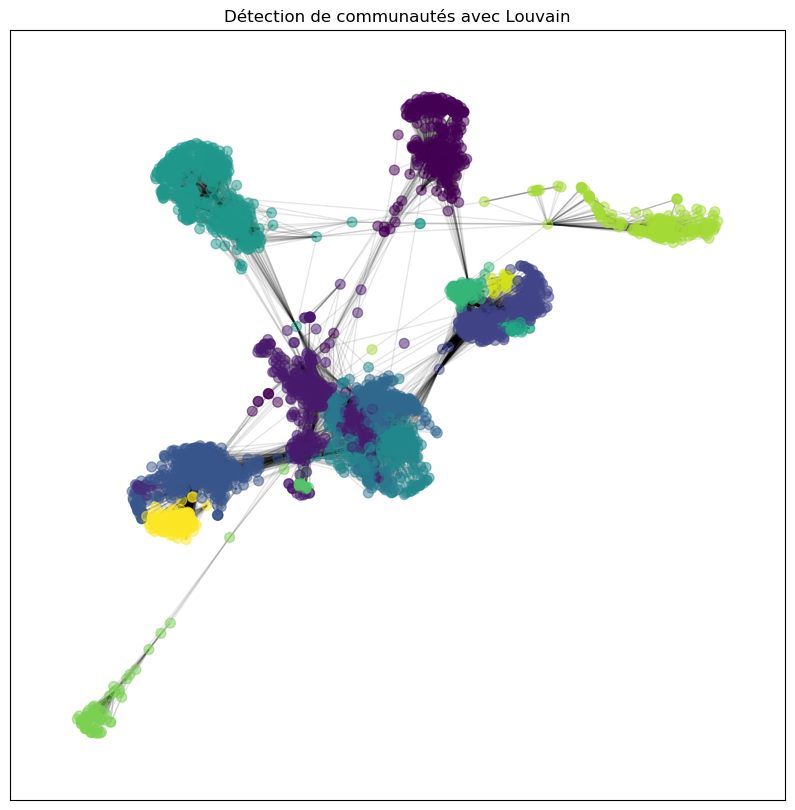

In [8]:
partition = community_louvain.best_partition(G)
cmap = plt.get_cmap('viridis', max(partition.values()) + 1)
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=50, cmap=cmap, node_color=list(partition.values()), alpha=0.5)
nx.draw_networkx_edges(G, pos, alpha=0.1)
plt.title("Détection de communautés avec Louvain")
plt.show()



##### Une interpretation sur le résultat
Ce graphe montre différentes communautés d’utilisateurs qui ont des intérêts ou des comportements similaires. Cela permet de mieux cibler les stratégies de communication, rendant les messages plus pertinents et efficaces pour chaque groupe.

## 5. Diffusion d'information

Simulez la propagation de l'information en utilisant les nœuds les plus influents identifiés par les différentes mesures de centralité. Comparez les résultats des différentes simulations.

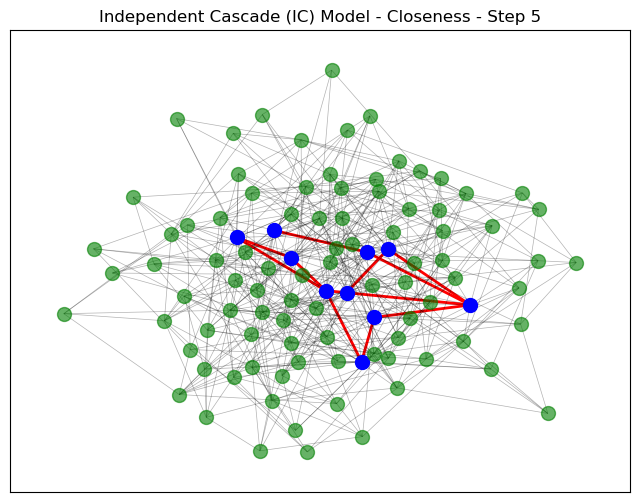

In [95]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Simulation de la propagation de l'information
def display_network(G, pos, seed_nodes, activated_nodes, step, model_name, centrality_type):
    plt.figure(figsize=(8, 6))
    
    # Récupérer les nœuds inactifs
    inactive_nodes = set(G.nodes()) - activated_nodes
    
    # Affichage des nœuds inactifs en gris
    nx.draw_networkx_nodes(G, pos, nodelist=inactive_nodes, node_color='gray', node_size=50, alpha=0.5)
    
    # Affichage des nœuds de départ (seed nodes) en bleu
    nx.draw_networkx_nodes(G, pos, nodelist=seed_nodes, node_color='blue', node_size=100)
    
    # Affichage des nœuds activés (activated nodes) en vert, sauf les seed nodes qui restent en bleu
    activated_nodes_only = activated_nodes - set(seed_nodes)
    nx.draw_networkx_nodes(G, pos, nodelist=activated_nodes_only, node_color='green', node_size=100, alpha=0.6)

    # Identifie les arêtes des top 10 (en rouge et largeur 2)
    top_10_edges = [(u, v) for u, v in G.edges() if u in seed_nodes and v in seed_nodes]
    nx.draw_networkx_edges(G, pos, edgelist=top_10_edges, edge_color='red', width=2)
    
    # Affichage des autres arêtes en noir et fines (largeur 0.5)
    other_edges = [(u, v) for u, v in G.edges() if not (u in seed_nodes and v in seed_nodes)]
    nx.draw_networkx_edges(G, pos, edgelist=other_edges, edge_color='black', width=0.5, alpha=0.3)

    plt.title(f'{model_name} - {centrality_type} - Step {step}')
    plt.show()

# Calcul des différentes centralités et sélection des 10 meilleurs nœuds
def calculate_centralities(G):
    return nx.degree_centrality(G), nx.betweenness_centrality(G), nx.closeness_centrality(G)

def simulate_ic(G, model_name, centrality_type):
    centrality_scores = {'Degree': 0, 'Betweenness': 1, 'Closeness': 2}[centrality_type]
    degree_centrality, betweenness_centrality, closeness_centrality = calculate_centralities(G)
    centrality_scores_dict = [degree_centrality, betweenness_centrality, closeness_centrality]
    
    # Sélection des 10 meilleurs nœuds
    sorted_nodes = sorted(centrality_scores_dict[centrality_scores], key=centrality_scores_dict[centrality_scores].get, reverse=True)[:10]
    activated_nodes = set(sorted_nodes)
    pos = nx.spring_layout(G, seed=42) 

    # Simulation de la propagation
    step = 0
    while True:
        clear_output(wait=True)
        display_network(G, pos, sorted_nodes, activated_nodes, step, model_name, centrality_type)
        
        # Augmenter la probabilité de propagation pour voir si cela aide
        newly_activated = [neighbor for node in activated_nodes for neighbor in G.neighbors(node) if np.random.rand() < 0.2 and neighbor not in activated_nodes]
        
        if not newly_activated:  # Si aucun nœud n'est activé, arrêter la simulation
            break
        
        activated_nodes.update(newly_activated)
        step += 1

# Exemple d'utilisation avec trois centralités différentes
G = nx.erdos_renyi_graph(100, 0.1)
model_name = "Independent Cascade (IC) Model"
for centrality_type in ["Degree", "Betweenness", "Closeness"]:
    simulate_ic(G, model_name, centrality_type)


##### Interpretation
Le graphe montre la propagation de l'information à partir des nœuds les plus influents, choisis selon différentes mesures de centralité (degré, intermédiaire, proximité). Au fur et à mesure des étapes, des nœuds sont activés, montrant comment l'information se diffuse à travers le réseau. Les arêtes entre les nœuds influents sont rouges, tandis que celles des autres nœuds sont fines et noires. Cela permet de visualiser comment l'information se propage différemment selon la centralité utilisée.

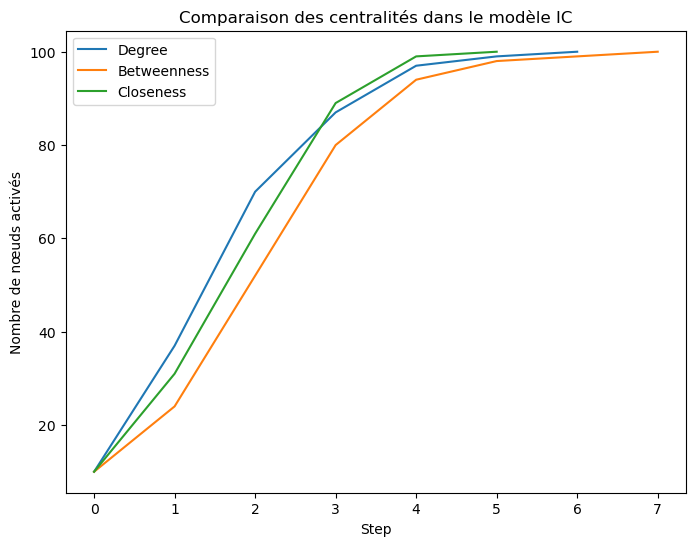

In [77]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

def simulate_ic_comparison(G, model_name, centrality_types):
    results = {centrality: [] for centrality in centrality_types}
    
    for centrality_type in centrality_types:
        degree_centrality, betweenness_centrality, closeness_centrality = calculate_centralities(G)
        
        centrality_scores_dict = {'Degree': degree_centrality, 'Betweenness': betweenness_centrality, 'Closeness': closeness_centrality}
        
        # Sélectionner les 10 meilleurs nœuds pour chaque centralité
        centrality_scores = centrality_scores_dict[centrality_type]
        sorted_nodes = sorted(centrality_scores, key=centrality_scores.get, reverse=True)[:10]
        activated_nodes = set(sorted_nodes)
        pos = nx.spring_layout(G, seed=42) 

        # Simulation de la propagation
        step = 0
        activated_at_each_step = [len(activated_nodes)]  # Sauvegarder le nombre de nœuds activés à chaque étape
        while True:
            newly_activated = [neighbor for node in activated_nodes for neighbor in G.neighbors(node) if np.random.rand() < 0.2 and neighbor not in activated_nodes]
            
            if not newly_activated:  # Si aucun nœud n'est activé, arrêter la simulation
                break
            
            activated_nodes.update(newly_activated)
            activated_at_each_step.append(len(activated_nodes))  # Sauvegarder à chaque étape
            step += 1
        
        results[centrality_type] = activated_at_each_step

    # Tracer les résultats pour comparaison
    plt.figure(figsize=(8, 6))
    for centrality_type in centrality_types:
        plt.plot(results[centrality_type], label=f'{centrality_type}')
    
    plt.xlabel('Step')
    plt.ylabel('Nombre de nœuds activés')
    plt.title(f'Comparaison des centralités dans le modèle IC')
    plt.legend()
    plt.show()

# Exemple d'utilisation avec trois centralités différentes
G = nx.erdos_renyi_graph(100, 0.1)
model_name = "Independent Cascade (IC) Model"
centrality_types = ["Degree", "Betweenness", "Closeness"]

simulate_ic_comparison(G, model_name, centrality_types)


## Conclusion
- Le Notebook Python détaillant toutes les étapes de l’analyse, avec les visualisations des distributions de centralité et des communautés.
- Rapport final (ce document) présentant la méthodologie, les résultats et les conclusions de l’étude.
- Visualisations graphiques pour explorer les différentes mesures de centralité et les communautés.

## Autres Sources

- **Stanford Network Analysis Project (SNAP)** :

Facebook Social Circles : Ce dataset est déjà utilisé, mais SNAP offre aussi des versions enrichies avec des attributs supplémentaires.
Twitter Social Network : Réseaux basés sur les followers/followings, permettant d'explorer des dynamiques différentes.
YouTube Social Network : Analyser les connexions entre utilisateurs via des abonnements à des chaînes.

- **KONECT (The Koblenz Network Collection)** :

Offre des graphes de réseaux sociaux, collaboration scientifique, réseaux de citations, réseaux de transport, etc.
Possibilité de travailler sur des réseaux bipartis ou dirigés pour diversifier les types d'analyses.

- **OpenStreetMap Data** :

Analyser les réseaux de transport ou d'infrastructures urbaines pour des applications en urbanisme.

- **Réseaux de collaboration académique** :

DBLP Computer Science Bibliography : Pour explorer les réseaux de co-auteurs dans la recherche en informatique.
Microsoft Academic Graph : Très riche pour les analyses de citations et de collaborations.

- **Les données des concours Kaggle** :

Recherchez des datasets sur des réseaux de communication, de transport ou d'interactions économiques.
